In [22]:
import re
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

In [62]:
df_rent_score1 = pd.read_excel("rent_score_amenity_count.xlsx")
df_rent_score1

,Location,Area code,Area,Price(in Euros),Beds,Bathroom,House_type,score,amenity_count,property_latitude,property_longitude
0,1 Finsbury Green|| Churchtown|| Dublin 14,D14,Dublin 14,2150,3,3,House to Rent,17.95,31,53.293447,-6.254306
1,1 Friarsland Roebuck Road|| Dublin 14|| Clonsk...,D14,Dublin 14,4650,5,4,House to Rent,18.60,23,53.304121,-6.234226
2,1 Montpelier Gardens|| Arbour Hill|| Dublin 7,D07,Dublin 7,2300,4,2,House to Rent,11.15,18,53.350443,-6.295565
3,1 Mountainview Road|| Ranelagh|| Dublin 6,D06,Dublin 6,2250,1,2,Apartment to Rent,20.10,34,53.320901,-6.251439
4,1 Old Distillery Apartments|| Smithfield|| Dub...,D01,Dublin 1,2400,3,2,Apartment to Rent,120.80,182,53.349084,-6.273264
...,...,...,...,...,...,...,...,...,...,...,...
1829,the rise|| Glasnevin|| Dublin 9,D09,Dublin 9,1350,2,2,Studio apartment to Rent,23.40,33,53.378367,-6.262805
1830,waterloo road|| Ballsbridge|| Dublin 4,D04,Dublin 4,850,2,2,Studio apartment to Rent,50.55,81,53.330835,-6.244263
1831,waterstown avenue|| Palmerstown|| Dublin 20,D20,Dublin 20,3000,4,3,House to Rent,14.10,20,53.357793,-6.371847
1832,whithefair|| Dublin 2,D02,Dublin 2,1700,1,1,Apartment to Rent,175.70,258,53.340121,-6.268679


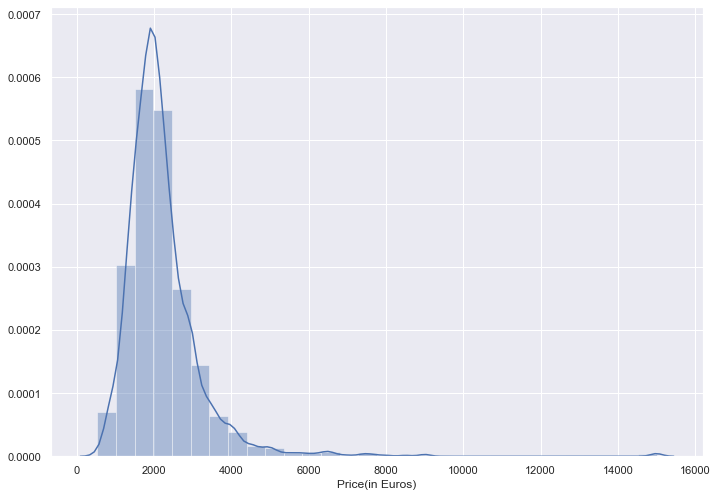

In [63]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df_rent_score1['Price(in Euros)'], bins=30)
plt.show()

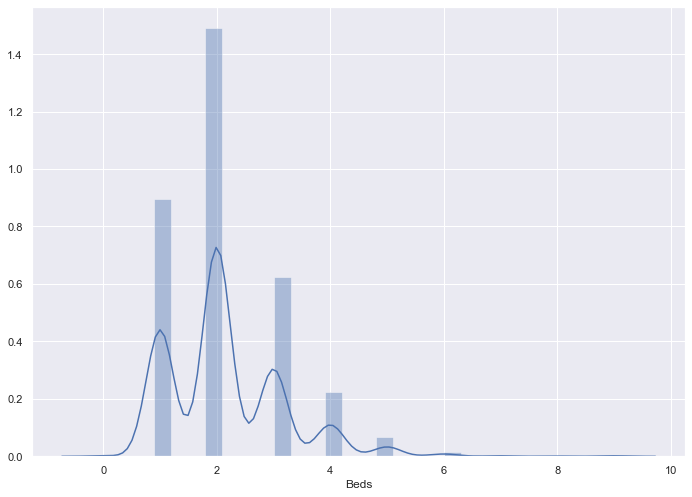

In [64]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df_rent_score1['Beds'], bins=30)
plt.show()

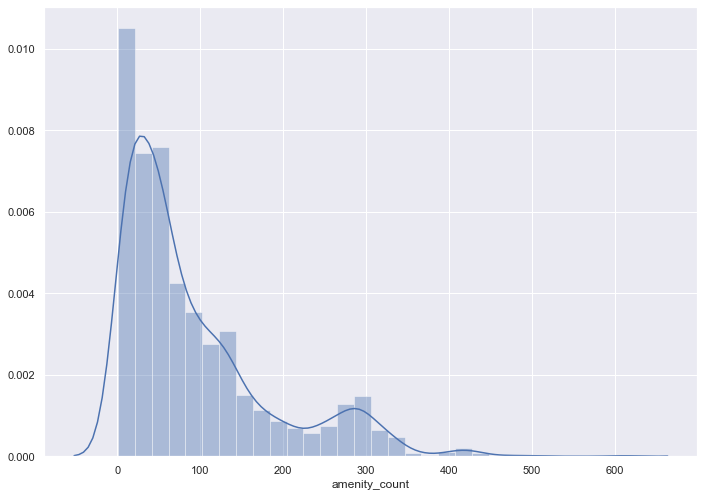

In [89]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df_rent_score1['amenity_count'], bins=30)
plt.show()

In [65]:
df =df_rent_score1.drop(columns=['score','property_latitude','property_longitude'])
# df.sort_values(by='Area')

,Location,Area code,Area,Price(in Euros),Beds,Bathroom,House_type,amenity_count
1519,Spencer Dock|| Dublin 1,D01,Dublin 1,1800,1,2,Apartment to Rent,80
883,First Avenue|| Dublin 1,D01,Dublin 1,2700,2,3,House to Rent,83
207,33 Mountjoy Square|| Dublin 1,D01,Dublin 1,1425,1,1,Apartment to Rent,166
1491,Smithfield gate apartment|| Smithfield|| Dublin 1,D01,Dublin 1,2000,2,1,Apartment to Rent,119
211,35 Fitzgibbon Street|| Dublin 1|| Dublin 1,D01,Dublin 1,1100,3,1,Studio apartment to Rent,126
...,...,...,...,...,...,...,...,...
417,Ailesbury lane ailesbury road dublin 4|| Dublin 4,D04,dublin 4,5500,3,2,House to Rent,22
241,40 Kenilworth park dublin 6w|| Harold's Cross|...,D06,dublin 6,1450,0,1,Apartment to Rent,39
242,40 kenilworth park|| dublin 6w|| Harold's Cros...,D06,dublin 6,2050,2,1,Apartment to Rent,40
1269,North circular road dublin 7|| Dublin 7,D07,dublin 7,1352,1,1,Apartment to Rent,73


In [79]:
df = df.astype({"Price":int,"amenity_count":float})
df.rename(columns={'Area code':'Area_code','Price(in Euros)':'Price'},inplace=True)
df.sort_values(by='Area_code',inplace=True)

In [80]:
df

,Location,Area_code,Area,Price,Beds,Bathroom,House_type,amenity_count
1519,Spencer Dock|| Dublin 1,D01,Dublin 1,1800,1,2,Apartment to Rent,80.0
1082,Jervis Park Apartment|| Jervis Street|| Dublin 1,D01,Dublin 1,2270,2,2,Apartment to Rent,298.0
1593,The Asgard|| Custom House Harbour|| IFSC|| Dub...,D01,Dublin 1,2200,2,2,Apartment to Rent,130.0
1157,Lower Sherrard Street|| Dublin 1,D01,Dublin 1,1170,1,1,Flat to Rent,115.0
787,Custom Hall|| Gardiner Street|| Dublin 1,D01,Dublin 1,2100,2,1,Apartment to Rent,200.0
...,...,...,...,...,...,...,...,...
106,2 Priorsgate|| Main Road|| Tallaght|| Tallaght...,D24,Dublin 24,1600,1,1,Apartment to Rent,43.0
505,Ard Mor Crescent|| Tallaght|| Dublin 24,D24,Dublin 24,900,3,3,Studio apartment to Rent,11.0
50,128 donomore crescent|| Tallaght|| Dublin 24,D24,Dublin 24,1000,3,1,Studio apartment to Rent,11.0
569,Beechdale Road|| Ballycullen|| Dublin 24,D24,Dublin 24,2500,4,3,House to Rent,1.0


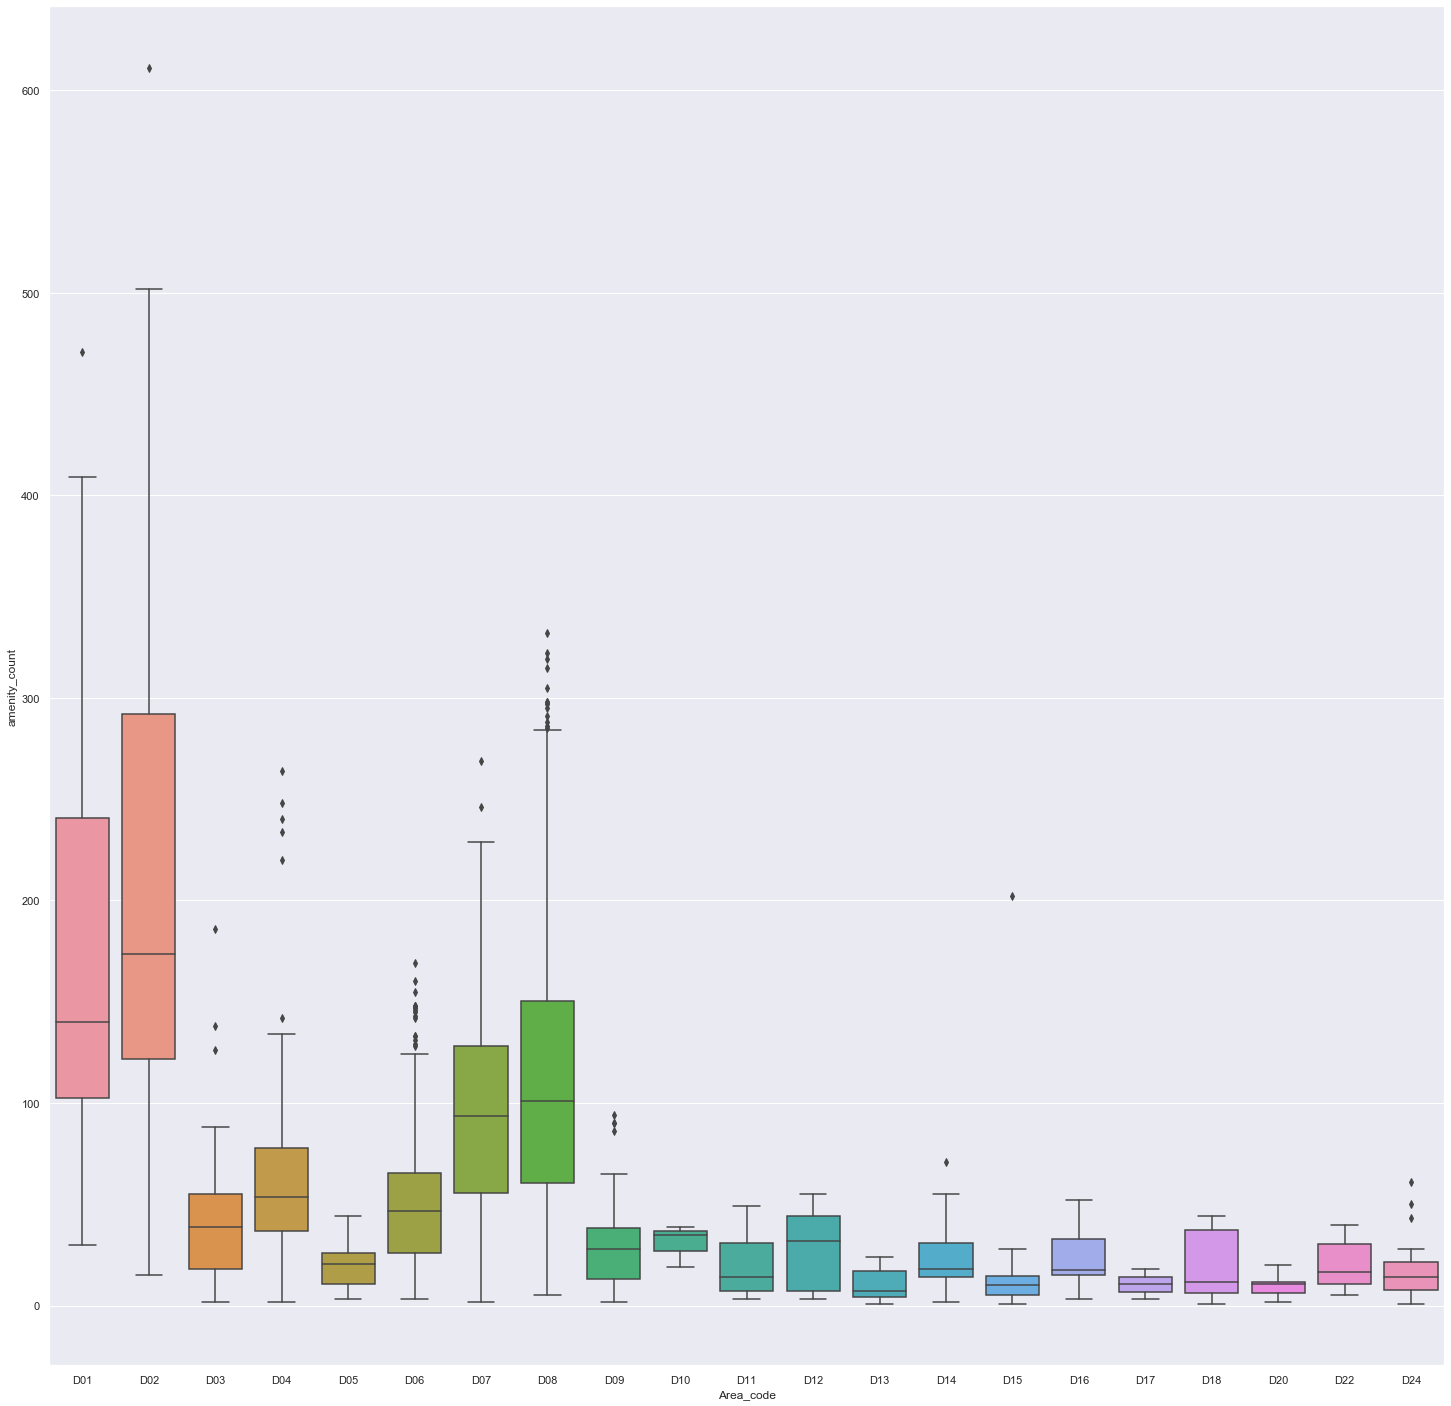

In [88]:
plt.figure(figsize=(25,25))
# sns.boxplot(x=df.Area_code, y=df.Price)
sns.boxplot(x=df.Area_code, y=df.amenity_count)

(4.0, 0.0)

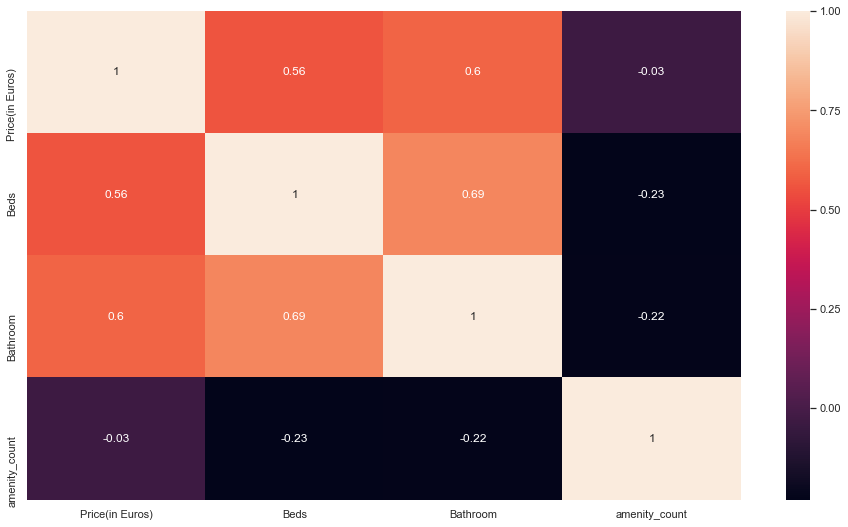

In [32]:
plt.figure(figsize=(16,9))
correlation_matrix = df.corr()
ax = sns.heatmap(data=correlation_matrix, annot=True)
bottom, top = ax.get_ylim() 
ax.set_ylim(bottom + 0.5, top - 0.5)